In [ ]:
import os
import sys

import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

os.chdir('../../')
sys.path.append('./')
from utils.locality_utilities import *
from utils.utils import *

rc={'font.size': 19, 'axes.labelsize': 20, 'legend.fontsize': 18, 
    'axes.titlesize': 21, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
sns.set(rc=rc)

sns.set_style("whitegrid")
pal = sns.color_palette('deep', 10)
pal = pal.as_hex()


/work/jdy/davin/WasG/utils/locality_utilities.py:15: UserWarning: torchattacks not imported
  warnings.warn('torchattacks not imported')


In [2]:
std_list = [0, 1e-2, 1e-1, 1]

std_list = list(map(float, std_list)) # convert to float
l2_max = 0
expref = {}
truncate = True # truncate distribution to be non-negative
for std in std_list:
    np.random.seed(0)
    exps = np.random.multivariate_normal(
        mean = np.array([0.2, 0.4]),
        cov = np.array([[1,0], [0,1]]) * std,
        size = 10000
    )
    if truncate:
        exps = exps[np.where((exps[:,0] <= 1) * (exps[:,1] <= 1))[0],:]
        exps = exps[np.where((exps[:,0] >= 0) * (exps[:,1] >=0))[0],:]
    exps = exps[:500,:]
    expref[str(std)] = exps
    l2_max = max(l2_max, np.linalg.norm(exps-exps.mean(axis = 1).reshape(-1,1), axis = 1).max())

print('done!')

print('l2_max: %s' % str(l2_max))

done!
l2_max: 0.6618943852530674


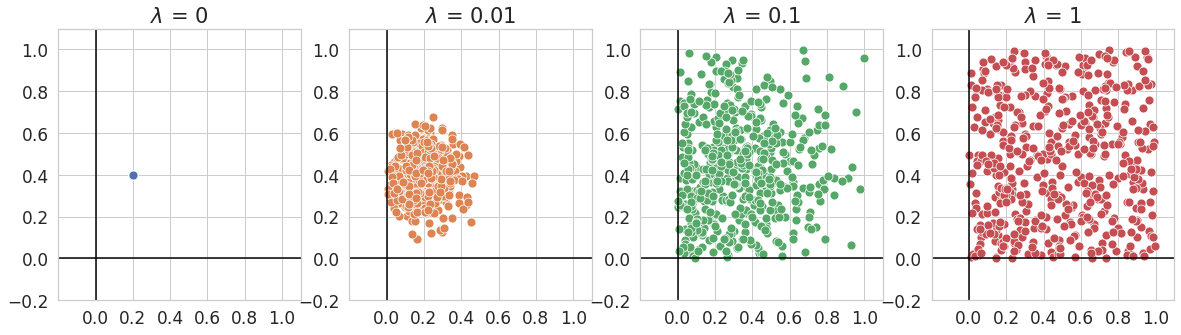

In [14]:
legend_mapping = {
    1: r'$\lambda$ = 1',
    0.01: r'$\lambda$ = 0.01',
    0.1: r'$\lambda$ = 0.1',
    0: r'$\lambda$ = 0',
}

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=False, sharex = False)
for i,std in enumerate(std_list):
    exps = expref['%s' % std]
    sns.scatterplot(x = exps[:,0], y = exps[:,1], ax = ax[i], s = 80, marker = 'o', color = pal[i])
    # plt.xlim((-.2,1.2))
    # plt.ylim((-.2,1.2))
    # Add black axes at x=0 and y=0
    ax[i].axhline(0, color='black', linewidth=1.5)  # Horizontal line (y=0)
    ax[i].axvline(0, color='black', linewidth=1.5)  # Vertical line (x=0)
    ax[i].set_xlim((-.2,1.1))
    ax[i].set_xticks(np.arange(0, 1.1, step=0.2))
    ax[i].set_ylim((-.2,1.1))
    ax[i].set_title(legend_mapping[std])
plt.savefig("./Figures/ablation_synthetic_dataset.pdf",bbox_inches='tight', transparent=True)
plt.show()


In [5]:
test_params = {}
test_params['nUnif'] = 500
test_params['seed'] = 0
# test_params['l2_bound'] = l2_bound_dict[dataset][0]
test_params['l2_bound'] = l2_max
df_results = pd.DataFrame()



###################################
test_params['testname'] = 'Euclidean_Reals_Slice'
test_params['metric'] = 'euclidean'
test_params['abs'] = False
test_params['exp_norm'] = 'sphere_l2_bound'
test_params['solver'] = 'pot_slice_symmetric'
# test_params['l2_bound'] = l2_bound_dict[dataset][0]
test_params['l2_bound'] = l2_max
test_params['centering'] = 'mean'

for std in std_list:
    test_params['std'] = std
    test_params['WG'] = wasserstein_globalness(expref['%s' % std], n_unif=test_params['nUnif'], seed =test_params['seed'], l2_bound = test_params['l2_bound'], log = False, metric =test_params['metric'], abs =test_params['abs'], exp_norm = test_params['exp_norm'], solver =test_params['solver'], centering = test_params['centering'])
    tmp = pd.DataFrame(test_params, index=[0])
    df_results = pd.concat([df_results, tmp], axis=0)


###################################
test_params['testname'] = 'Euclidean_Positive_Slice'
test_params['metric'] = 'euclidean'
test_params['abs'] = True
test_params['exp_norm'] = 'sphere_l2_bound'
test_params['solver'] = 'pot_slice_symmetric'
# test_params['l2_bound'] = l2_bound_dict[dataset][0]
test_params['l2_bound'] = 1
test_params['centering'] = 'mean'

for std in std_list:
    test_params['std'] = std
    test_params['WG'] = wasserstein_globalness(expref['%s' % std], n_unif=test_params['nUnif'], seed =test_params['seed'], l2_bound = test_params['l2_bound'], log = False, metric =test_params['metric'], abs =test_params['abs'], exp_norm = test_params['exp_norm'], solver =test_params['solver'], centering = test_params['centering'])
    tmp = pd.DataFrame(test_params, index=[0])
    df_results = pd.concat([df_results, tmp], axis=0)

###################################
test_params['testname'] = 'Euclidean_01_Slice'
test_params['metric'] = 'euclidean'
test_params['abs'] = True
test_params['exp_norm'] = 'sphere_l2_bound'
test_params['solver'] = 'pot_slice_symmetric'
test_params['l2_bound'] = 2
test_params['centering'] = 'mean'

for std in std_list:
    test_params['std'] = std
    test_params['WG'] = wasserstein_globalness(expref['%s' % std], n_unif=test_params['nUnif'], seed =test_params['seed'], l2_bound = test_params['l2_bound'], log = False, metric =test_params['metric'], abs =test_params['abs'], exp_norm = test_params['exp_norm'], solver =test_params['solver'], centering = test_params['centering'])
    tmp = pd.DataFrame(test_params, index=[0])
    df_results = pd.concat([df_results, tmp], axis=0)

###################################
test_params['testname'] = 'ranking'
test_params['metric'] = 'kendalltau'
test_params['abs'] = False # this doesn't do anything
test_params['exp_norm'] = 'NA' # this doesn't do anything
test_params['solver'] = 'pot' # this doesn't do anything
test_params['l2_bound'] = 1 # this doesn't do anything
test_params['centering'] = 'none'
test_params['nUnif'] = 100

for std in tqdm(std_list):
    test_params['std'] = std
    test_params['WG'] = wasserstein_globalness(expref['%s' % std][:100,:], n_unif=test_params['nUnif'], seed =test_params['seed'], l2_bound = test_params['l2_bound'], log = False, metric =test_params['metric'], abs =test_params['abs'], exp_norm = test_params['exp_norm'], solver =test_params['solver'], centering = test_params['centering'])
    tmp = pd.DataFrame(test_params, index=[0])
    df_results = pd.concat([df_results, tmp], axis=0)

100%|██████████| 4/4 [00:22<00:00,  5.51s/it]


In [6]:
df_results

,nUnif,seed,l2_bound,testname,metric,abs,exp_norm,solver,centering,std,WG
0,500,0,0.661894,Euclidean_Reals_Slice,euclidean,False,sphere_l2_bound,pot_slice_symmetric,mean,0.00,1.000000
0,500,0,0.661894,Euclidean_Reals_Slice,euclidean,False,sphere_l2_bound,pot_slice_symmetric,mean,0.01,0.707100
0,500,0,0.661894,Euclidean_Reals_Slice,euclidean,False,sphere_l2_bound,pot_slice_symmetric,mean,0.10,0.325889
0,500,0,0.661894,Euclidean_Reals_Slice,euclidean,False,sphere_l2_bound,pot_slice_symmetric,mean,1.00,0.130649
0,500,0,1.000000,Euclidean_Positive_Slice,euclidean,True,sphere_l2_bound,pot_slice_symmetric,mean,0.00,1.000000
0,500,0,1.000000,Euclidean_Positive_Slice,euclidean,True,sphere_l2_bound,pot_slice_symmetric,mean,0.01,0.805744
0,500,0,1.000000,Euclidean_Positive_Slice,euclidean,True,sphere_l2_bound,pot_slice_symmetric,mean,0.10,0.547269
0,500,0,1.000000,Euclidean_Positive_Slice,euclidean,True,sphere_l2_bound,pot_slice_symmetric,mean,1.00,0.412527
0,500,0,2.000000,Euclidean_01_Slice,euclidean,True,sphere_l2_bound,pot_slice_symmetric,mean,0.00,1.000000
0,500,0,2.000000,Euclidean_01_Slice,euclidean,True,sphere_l2_bound,pot_slice_symmetric,mean,0.01,0.902719


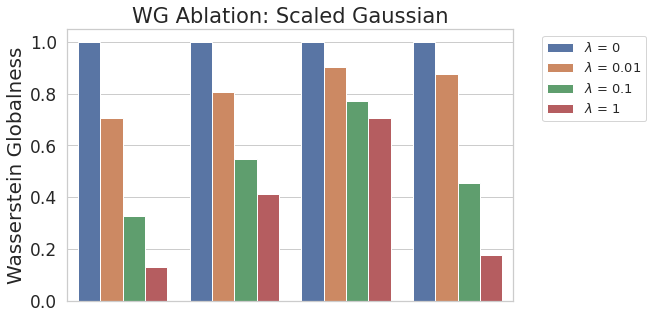

In [9]:
legend_mapping = {
    1: r'$\lambda$ = 1',
    0.01: r'$\lambda$ = 0.01',
    0.1: r'$\lambda$ = 0.1',
    0: r'$\lambda$ = 0',
}


df_results['std_clean'] = df_results['std'].map(legend_mapping)
fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=True, sharex = True)
sns.barplot(data = df_results, hue = 'std_clean', x = 'testname', y = 'WG')

# # Annotate values above the bars
# for bar in ax.patches:
#     height = bar.get_height()
#     ax.text(
#         bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
#         height + .01,  # Y-coordinate (slightly above the bar)
#         f"{height:.2f}",  # Value annotation
#         ha='center',  # Horizontal alignment
#         va='bottom',  # Vertical alignment
#         fontsize = 12
#     )
ax.set_xticklabels([])
# plt.ylim((0.5, 1))
plt.ylabel('Wasserstein Globalness')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',ncol=1, fancybox=True, shadow=False, fontsize = 13)
plt.title('WG Ablation: Scaled Gaussian')
plt.savefig("./Figures/ablation_synthetic.pdf",bbox_inches='tight', transparent=True)
plt.show()